In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
# Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


#### 1. Dataset Contains 414 Rows and 9 Columns.

#### 2. 0 Null values in Dataset

# 

<AxesSubplot:>

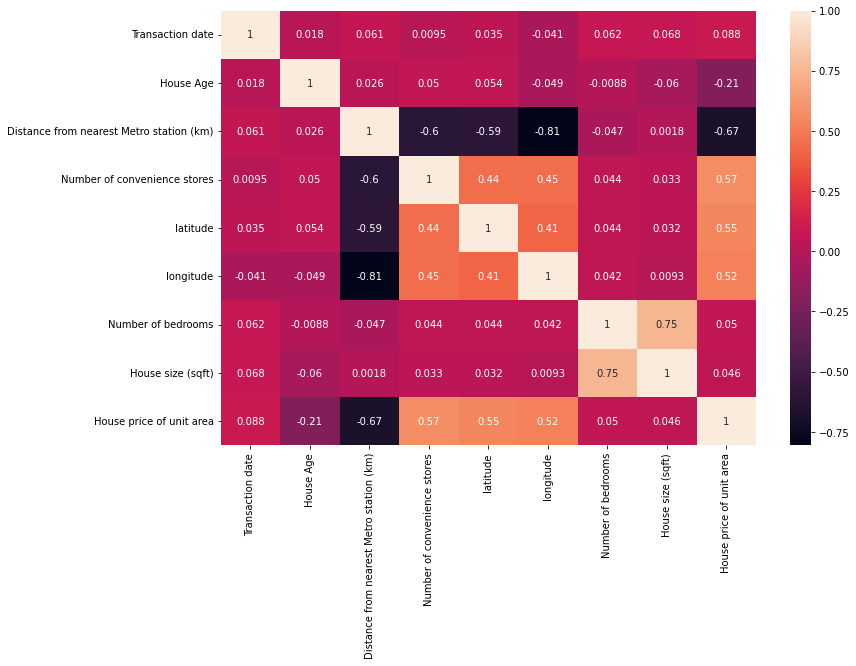

In [5]:
# Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() ,annot = True)

## Data Distribution

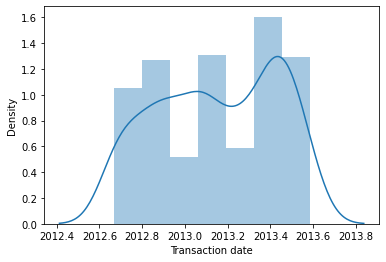

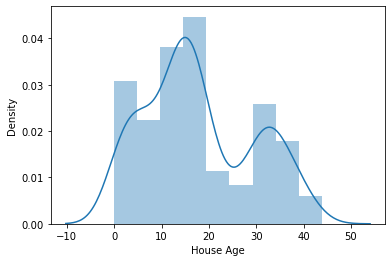

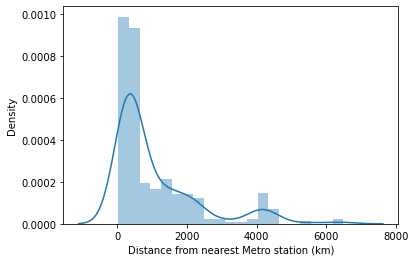

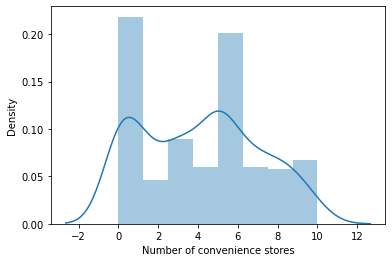

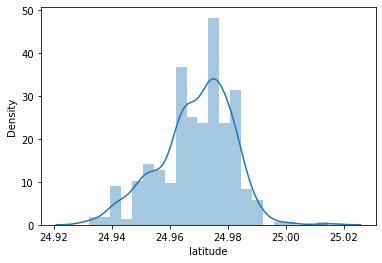

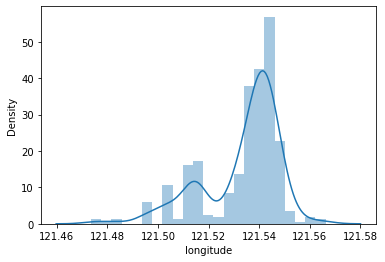

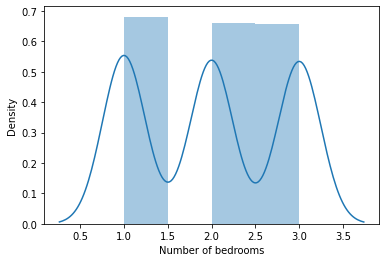

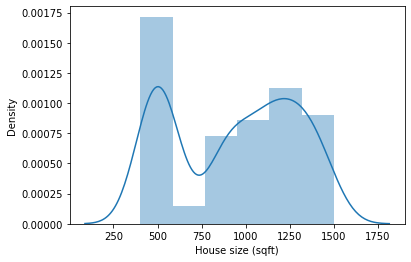

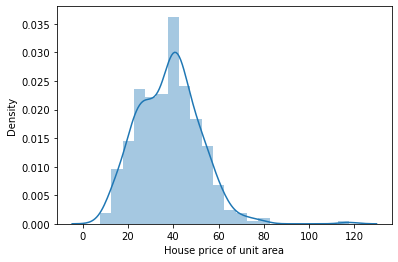

In [6]:
for x in df.columns:
    sns.distplot(df[x])
    plt.show()

# 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
x = df.drop(columns = 'House price of unit area')
y = df['House price of unit area']

In [9]:
# Scaling independent variables
scaler = StandardScaler()

In [10]:
x_scaled = scaler.fit_transform(x)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state = 20,shuffle=True)

In [12]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

In [13]:
# Pipelines for models

pipeline_svr = Pipeline([('SVM', SVR())])
pipeline_tree = Pipeline([('Decision Tree', DecisionTreeRegressor())])
pipeline_for = Pipeline([('Random Forest', RandomForestRegressor())])
pipeline_lr = Pipeline([('Linear Regession' ,LinearRegression())])
pipeline_xgb = Pipeline([('XGBRegressor' ,XGBRegressor())])
pipeline_lasso = Pipeline([('Lasso' ,Lasso())])

In [14]:
pipelines = [pipeline_svr, pipeline_tree, pipeline_for ,pipeline_lr ,pipeline_xgb ,pipeline_lasso]
pipe_dict = {0: 'SVR', 1:'Decision Tree', 2:'Random Forest' ,3:'Linear' ,4 :'XGBoost' ,5:'Lasso'}

for pipe in pipelines:
    pipe.fit(xtrain, ytrain)

In [15]:
from sklearn import metrics

for i,model in enumerate(pipelines):
    pred = model.predict(xtest)
    print("{} MSE :{}".format(pipe_dict[i],np.sqrt(metrics.mean_squared_error(ytest ,pred))))
    print("{} R2 Score :{}".format(pipe_dict[i],metrics.r2_score(ytest ,pred)*100))
    
    print()

SVR MSE :8.145957954720005
SVR R2 Score :53.43844772097789

Decision Tree MSE :8.688420676173193
Decision Tree R2 Score :47.03063055556282

Random Forest MSE :5.844642856924618
Random Forest R2 Score :76.03049426308034

Linear MSE :7.125711684019308
Linear R2 Score :64.3713296738785

XGBoost MSE :5.99093931427626
XGBoost R2 Score :74.81552145922822

Lasso MSE :7.537627244700769
Lasso R2 Score :60.13310287254935



## Random Forest Regressor giving us Highest accuracy followed by  XGBoost.